In [2]:
# !pip install statsmodels

In [3]:
# 예시를 위한 데이터 형성

import pandas as pd

data = {'x': [1, 2, 3, 4, 5], 'y':[1, 3, 4, 6, 5]}
df = pd.DataFrame(data)
df

,x,y
0,1,1
1,2,3
2,3,4
3,4,6
4,5,5


In [4]:
# 데이터를 통한 선형 모델 생성

import statsmodels.formula.api as smf

lm_model = smf.ols(formula='y~x', data=df).fit() # y~x: y=ax + b 형식 의미

In [5]:
# 선형 모델의 파라미터 확인

lm_model.params

Intercept    0.5
x            1.1
dtype: float64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1200x1000 with 0 Axes>

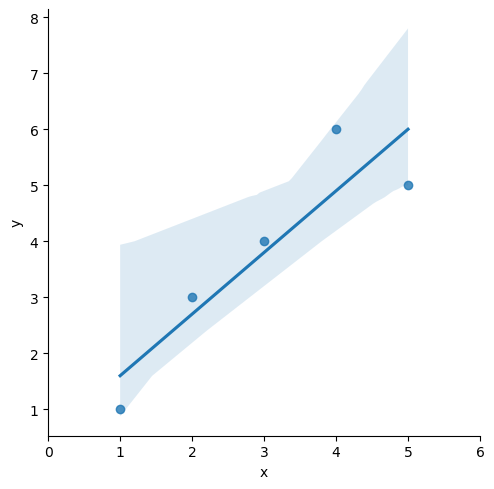

In [7]:
# seaborn을 통한 그래프 그리기

plt.figure(figsize=(12, 10))
sns.lmplot(x='x', y='y', data=df)
plt.xlim([0, 6])

plt.show()

In [8]:
resid = lm_model.resid
resid

0   -0.6
1    0.3
2    0.2
3    1.1
4   -1.0
dtype: float64

In [9]:
# numpy를 이용한 R-squared 값 구하기

import numpy as np

mu = np.mean(df.y) # 실제 데이터 셋의 결과 평균

y = df.y # 실제 데이터 셋의 y 값들

yhat = lm_model.predict() # 모델을 통해 예측한 y 값들

np.sum((yhat-mu)**2) / np.sum((y-mu)**2) # 결정계수 식 대입

0.8175675675675669

In [10]:
# statsmodels 모듈의 함수를 이용한 R-squared 값 구하기

lm_model.rsquared

0.8175675675675675

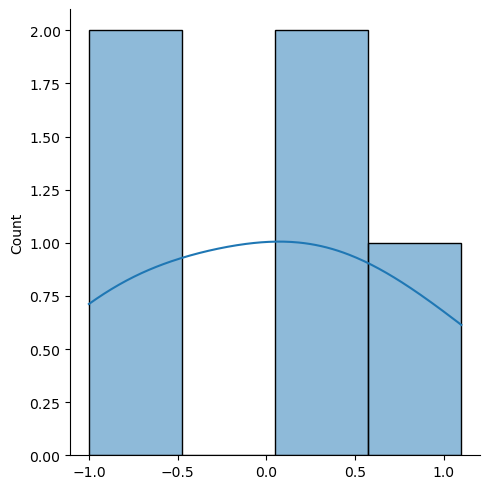

In [11]:
sns.displot(resid, kde=True)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# 데이터 로드

data_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/ecommerce.csv'
data = pd.read_csv(data_url)

In [14]:
data.head(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


#### 위 데이터
* 사용자 세션길이: 한 번 접속시 평균 이용 시간
* time on app: 휴대폰 앱으로 접속했을 때 유지시간
* time on website: PC 웹사이트로 접속했을 때 유지시간
* length of membership: 회원 유지 기간

In [15]:
# 필요 없는 컬럼 삭제

data.drop(['Email', 'Address', 'Avatar'], axis=1, inplace=True)
data.head(3)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505


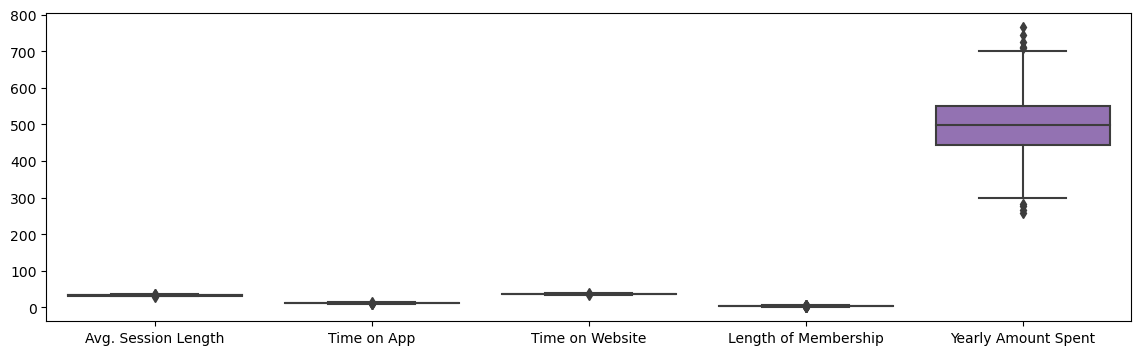

In [16]:
# 컬럼 별 boxplot 생성

plt.figure(figsize=(14, 4))
sns.boxplot(data=data);

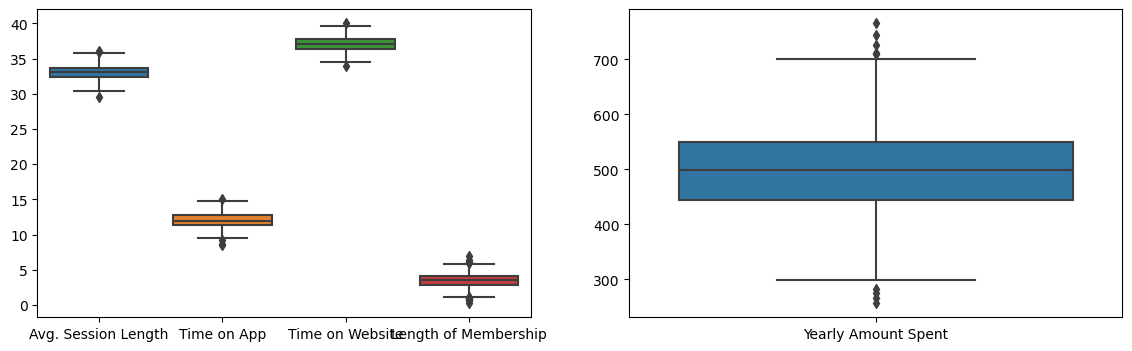

In [17]:
# 좁혀져서 파악이 어려운 컬럼들이 존재하므로 나눠서 boxplot 생성

fig, ax = plt.subplots(ncols=2, figsize=(14,4))

sns.boxplot(data=data.iloc[:, :-1], ax = ax[0])
sns.boxplot(data=data.iloc[:, -1:], ax = ax[1]);

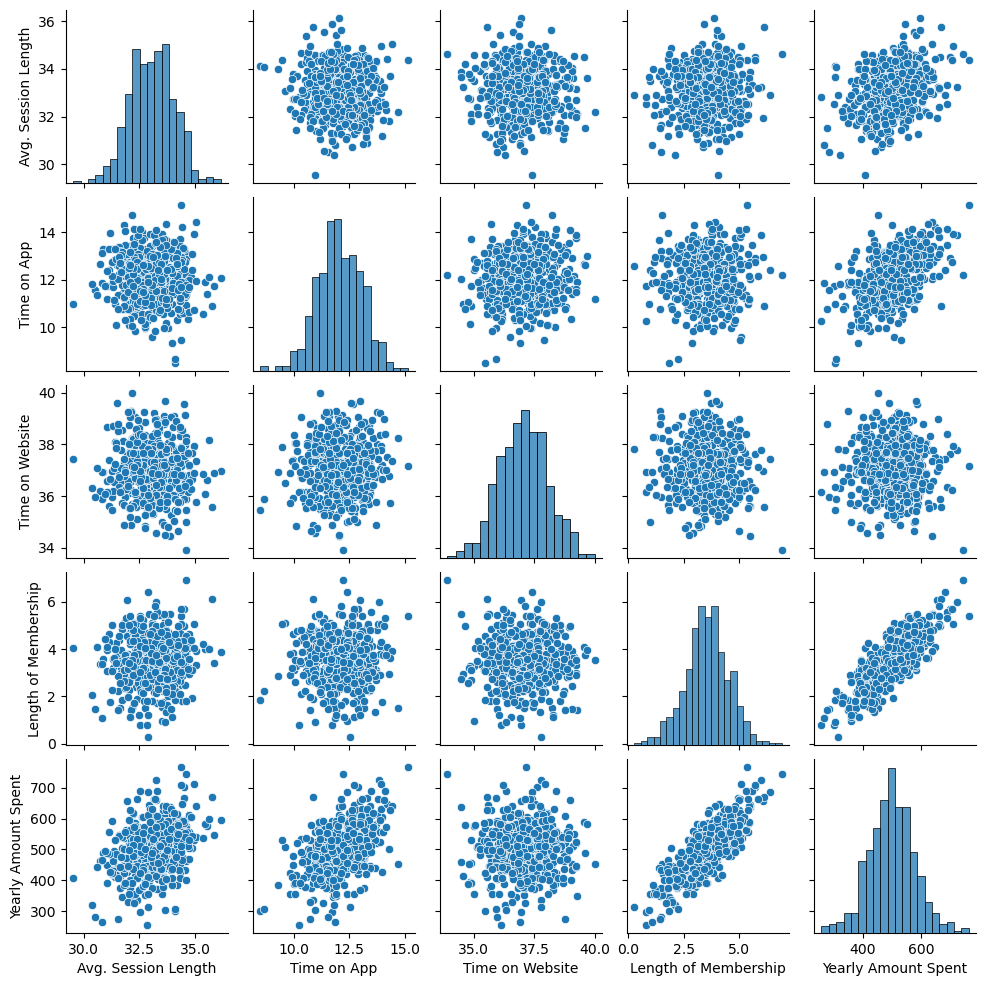

In [18]:
# pairplot으로 경향 확인

sns.pairplot(data=data, height = 2);

<Figure size 1200x600 with 0 Axes>

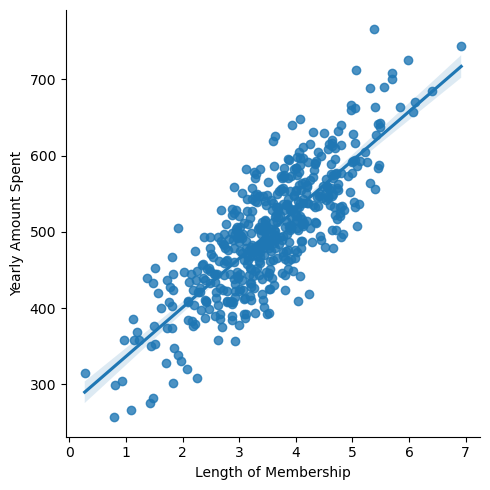

In [19]:
# 관련 있어보이는 Length of Membership <> Yearly Amount Spent 로 lmplot 생성

plt.figure(figsize=(12,6))
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=data);

In [20]:
# 통계적 회귀 모델 및 리포트 생성

import statsmodels.api as sm

X = data['Length of Membership']
Y = data['Yearly Amount Spent']
lm = sm.OLS(Y, X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.970
Model:                             OLS   Adj. R-squared (uncentered):              0.970
Method:                  Least Squares   F-statistic:                          1.617e+04
Date:                 Thu, 03 Aug 2023   Prob (F-statistic):                        0.00
Time:                         14:13:15   Log-Likelihood:                         -2945.2
No. Observations:                  500   AIC:                                      5892.
Df Residuals:                      499   BIC:                                      5897.
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Length of Membership   135.6117      1.067    127.145      0.000     133.516     137.707
==============================================================================
Omnibus:                        1.408   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                1.472
Skew:                           0.125   Prob(JB):                        0.479
Kurtosis:                       2.909   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* R-squared: 모형 적합도, y의 분산을 각각의 변수들이 ~%로 설명할 수 있음
* Adj. R-squared: 독립 변수가 여러 개인 다중 회귀 분석에서 사용
* Prob. F-Statistic: 회귀 모형에 대한 통계적 유의미성 검정 (0.05이하라면 모집단에서도 의미가 있다고 볼 수 있음)

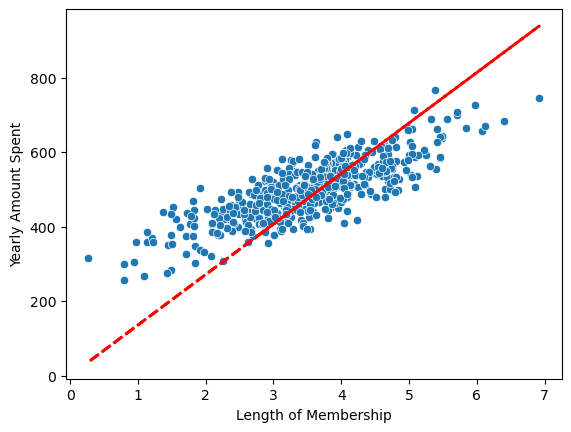

In [21]:
# 회귀 모델 plot

pred = lm.predict(X)
sns.scatterplot(x=X, y=Y)
plt.plot(X, pred, 'r', ls='--', lw=2);

* 상수 항이 없기 때문에 회귀 모델이 (0, 0)을 기준으로 만들어짐 (직선이 꽤나 치우친 것을 볼 수 있음)

In [22]:
# 상수항 추가
# OLS 접근 방법을 따라 X 데이터의 1에 해당하는 열 추가

X = np.c_[X, [1]*len(X)] # .r_ 을 이용하면 행 추가 가능
X[:5]

array([[4.08262063, 1.        ],
       [2.66403418, 1.        ],
       [4.1045432 , 1.        ],
       [3.12017878, 1.        ],
       [4.44630832, 1.        ]])

In [23]:
# 회귀 모델 재 생성

lm = sm.OLS(Y, X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.655
Model:                             OLS   Adj. R-squared:                  0.654
Method:                  Least Squares   F-statistic:                     943.9
Date:                 Thu, 03 Aug 2023   Prob (F-statistic):          4.81e-117
Time:                         14:13:16   Log-Likelihood:                -2629.9
No. Observations:                  500   AIC:                             5264.
Df Residuals:                      498   BIC:                             5272.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            64.2187      2.090     30.723      0.000      60.112      68.326
const        272.3998      7.675     35.492      0.000     257.320     287.479
==============================================================================
Omnibus:                        1.092   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                1.122
Skew:                           0.037   Prob(JB):                        0.571
Kurtosis:                       2.780   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* R-squared 수치가 기존보다 적어진 것을 확인할 수 있음
* constant가 생겼음
* AIC: 만들어진 모델이 기존 데이터를 얼마나 잘 반영하는지 보여주는 수치 (기존 데이터 손실 정도, 낮을 수록 좋음)

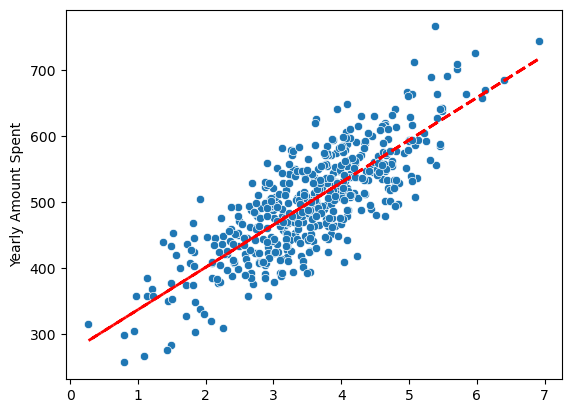

In [24]:
# 회귀 모델 plot

pred = lm.predict(X)

sns.scatterplot(x=X[:, 0], y=Y)
plt.plot(X[:, 0], pred, 'r', ls='--', lw=2);

* 앞서 만들어진 데이터 보다 훨씬 직선이 데이터들을 잘 반영하는 것처럼 보임
* $R^2$ 값을 무조건적으로 신뢰할 수는 없다는 것을 의미

In [25]:
# ML을 위한 데이터 분리

from sklearn.model_selection import train_test_split

X = data.drop('Yearly Amount Spent', axis=1)
y = data['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [26]:
import statsmodels.api as sm

lm = sm.OLS(y_train, X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.998
Model:                             OLS   Adj. R-squared (uncentered):              0.998
Method:                  Least Squares   F-statistic:                          4.179e+04
Date:                 Thu, 03 Aug 2023   Prob (F-statistic):                        0.00
Time:                         14:13:16   Log-Likelihood:                         -1591.7
No. Observations:                  350   AIC:                                      3191.
Df Residuals:                      346   BIC:                                      3207.
Df Model:                            4                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Avg. Session Length     11.8431      0.906     13.070      0.000      10.061      13.625
Time on App             35.2169      1.212     29.046      0.000      32.832      37.602
Time on Website        -14.2536      0.840    -16.960      0.000     -15.907     -12.601
Length of Membership    60.1702      1.275     47.183      0.000      57.662      62.678
==============================================================================
Omnibus:                        0.648   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.723   Jarque-Bera (JB):                0.755
Skew:                          -0.042   Prob(JB):                        0.686
Kurtosis:                       2.788   Cond. No.                         55.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

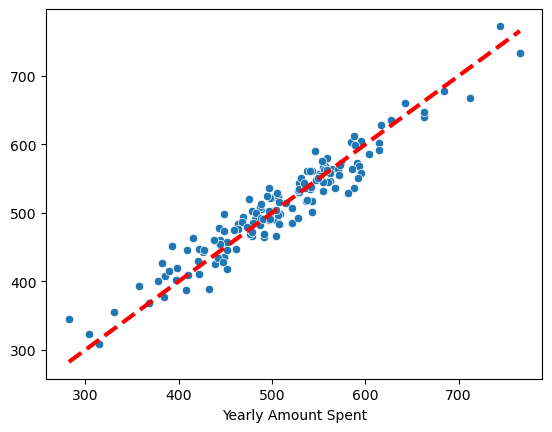

In [27]:
# 참 값 vs 예측 값 >> 데이터와 예측 값으로 직선을 그려 기울기가 1에 가까운지 확인하여 모델의 정확도를 파악

pred = lm.predict(X_test)  # 여기서 lm은 train데이터로 학습된 모델

sns.scatterplot(x=y_test, y=pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', ls='dashed', lw=3)

In [28]:
# !pip install sympy

In [29]:
# cost function을 수식으로 이해해보기

# [(2, 1), (3, 5), (5, 6)]의 데이터가 있다고 하였을 때, 아래와 같이 cost function을 세울 수 있음

import numpy as np

np.poly1d([2, -1])**2 + np.poly1d([3, -5])**2 + np.poly1d([5, -6])**2

poly1d([ 38, -94,  62])

$J(\theta) = (2\theta-1)^2 + (3\theta-5)^2 + (5\theta-6)^2$

$J(\theta) = 38\theta^2 - 94 \theta + 62$

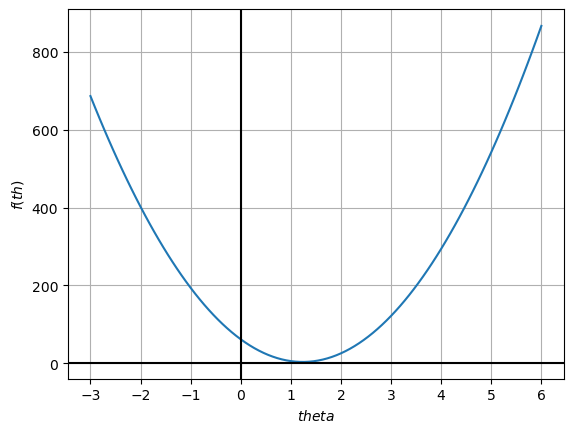

In [30]:
t = np.poly1d([2, -1])**2 + np.poly1d([3, -5])**2 + np.poly1d([5, -6])**2
x = np.linspace(-3, 6, 100)
y = t(x)

plt.plot(x, y)
plt.grid(True)
plt.xticks([-3, -2, -1, 0, 1, 2, 3, 4, 5, 6])
plt.yticks([0, 200, 400, 600, 800])
plt.xlabel('$theta$')
plt.ylabel('$f(th)$')
plt.axvline(x=0, color = 'k')
plt.axhline(y=0, color = 'k')

plt.show()

In [31]:
# 최솟값 구하기 위해 미분

import sympy as sym

theta = sym.Symbol('theta')
diff_th = sym.diff(38*theta**2 - 94*theta + 62, theta)
diff_th

76*theta - 94

* cost function이 최소인 예측 모델은
  - $y=\frac{76}{94}$

## 보스턴 집값을 이용한 예제

In [32]:
# 보스턴 집값 데이터 로드

import pandas as pd

boston_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/' +\
                                    '/master/dataset/boston.csv'

boston = pd.read_csv(boston_url, sep=',')

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [33]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

#### 특성의 의미

* CRIM: 범죄율
* ZN: 25,000 평방 피트 초과 거주 지역 비율
* INDUS: 비소매상업지역 면적 비율
* CHAS: 찰그상의 경계에 위치한 경우 1, 아니면 0
* NOX: 일산화 질소 농도
* RM: 주택당 방 수
* AGE: 1940년 이전에 건축된 주택의 비율
* DIS: 직업센터의 거리
* RAD: 방사형 고속도로까지의 거리
* TAX: 재산세율
* PTRATIO: 학생/교사 비율
* B: 인구 중 흑인 비율
* LSTAT: 인구 중 하위 계층 비율
* MEDV: PRICE이므로 컬럼 이름 변경

In [34]:
boston.rename(columns={'MEDV' : 'PRICE'}, inplace=True)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [35]:
# 가격에 대해 histogram 생성

import plotly.express as px

fig = px.histogram(boston, x='PRICE')
fig.show()

In [36]:
# 상관계수 확인

corr_mat = boston.corr().round(1)
corr_mat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.0,-0.2,0.4,-0.1,0.4,-0.2,0.4,-0.4,0.6,0.6,0.3,-0.4,0.5,-0.4
ZN,-0.2,1.0,-0.5,-0.0,-0.5,0.3,-0.6,0.7,-0.3,-0.3,-0.4,0.2,-0.4,0.4
INDUS,0.4,-0.5,1.0,0.1,0.8,-0.4,0.6,-0.7,0.6,0.7,0.4,-0.4,0.6,-0.5
CHAS,-0.1,-0.0,0.1,1.0,0.1,0.1,0.1,-0.1,-0.0,-0.0,-0.1,0.0,-0.1,0.2
NOX,0.4,-0.5,0.8,0.1,1.0,-0.3,0.7,-0.8,0.6,0.7,0.2,-0.4,0.6,-0.4
RM,-0.2,0.3,-0.4,0.1,-0.3,1.0,-0.2,0.2,-0.2,-0.3,-0.4,0.1,-0.6,0.7
AGE,0.4,-0.6,0.6,0.1,0.7,-0.2,1.0,-0.7,0.5,0.5,0.3,-0.3,0.6,-0.4
DIS,-0.4,0.7,-0.7,-0.1,-0.8,0.2,-0.7,1.0,-0.5,-0.5,-0.2,0.3,-0.5,0.2
RAD,0.6,-0.3,0.6,-0.0,0.6,-0.2,0.5,-0.5,1.0,0.9,0.5,-0.4,0.5,-0.4
TAX,0.6,-0.3,0.7,-0.0,0.7,-0.3,0.5,-0.5,0.9,1.0,0.5,-0.4,0.5,-0.5


<Axes: >

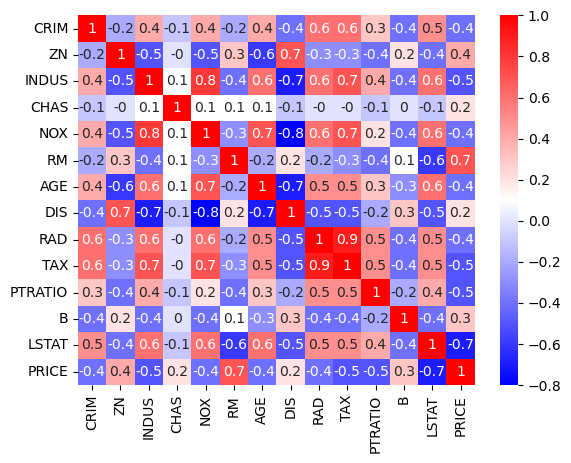

In [37]:
# 상관계수를 더 보기 쉽도록 히트맵으로 표현

sns.heatmap(data=corr_mat, annot=True, cmap='bwr')

* 좌측 최하단 가격 부분에서 RM, LSTAT과 높은 상관관계를 보임 (각각 0.7, -0.7)

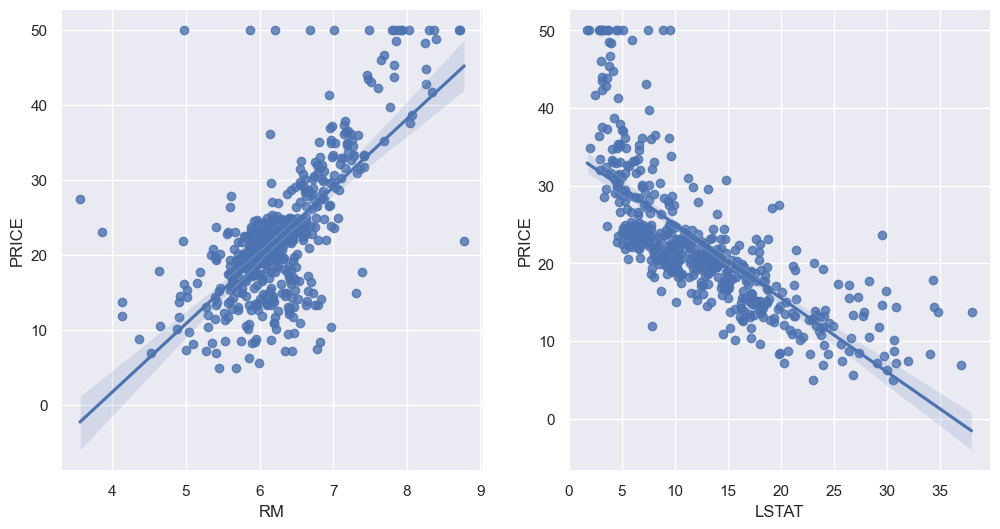

In [38]:
# Price <> RM/LSTAT 과의 관계 추가 확인

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(12,6)})
fig, ax = plt.subplots(ncols=2)

sns.regplot(x='RM', y="PRICE", data=boston, ax=ax[0])
sns.regplot(x='LSTAT', y="PRICE", data=boston, ax=ax[1])

plt.show()

* 가설
  1. 방의 갯수와 집 값은 비례?
  2. 저소득층 인구와 집 값은 반 비례?

In [39]:
# 데이터 분리

from sklearn.model_selection import train_test_split

X = boston.drop('PRICE', axis=1)
y = boston['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [40]:
# linear regression 사용

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [42]:
# RMS를 이용하여 모델 평가

import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data: ', rmse_tr)
print('RMSE of Test Data: ', rmse_test)

RMSE of Train Data:  4.642806069019824
RMSE of Test Data:  4.931352584146702


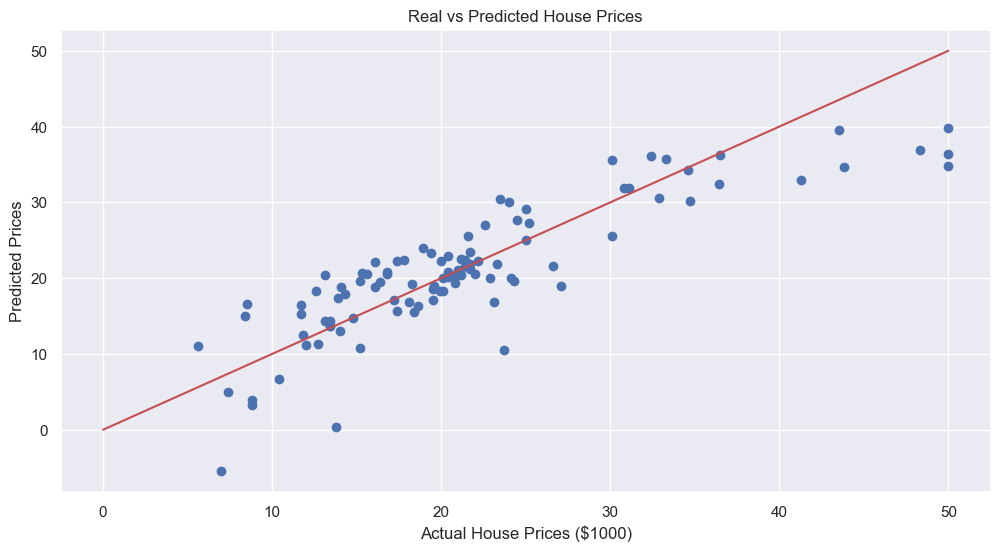

In [44]:
# 성능 확인

plt.scatter(y_test, pred_test)
plt.xlabel('Actual House Prices ($1000)')
plt.ylabel('Predicted Prices')
plt.title("Real vs Predicted House Prices")
plt.plot([0, 50], [0, 50], 'r')
plt.show()

In [48]:
# LSTAT의 영향을 보기 위해 학습데이터에서 해당 열 제거하여 위 과정 반복

X = boston.drop(['PRICE', 'LSTAT'], axis=1)
y = boston['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

reg = LinearRegression()
reg.fit(X_train, y_train)

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data: ', rmse_tr)
print('RMSE of Test Data: ', rmse_test)

RMSE of Train Data:  5.165137874244864
RMSE of Test Data:  5.295595032597148


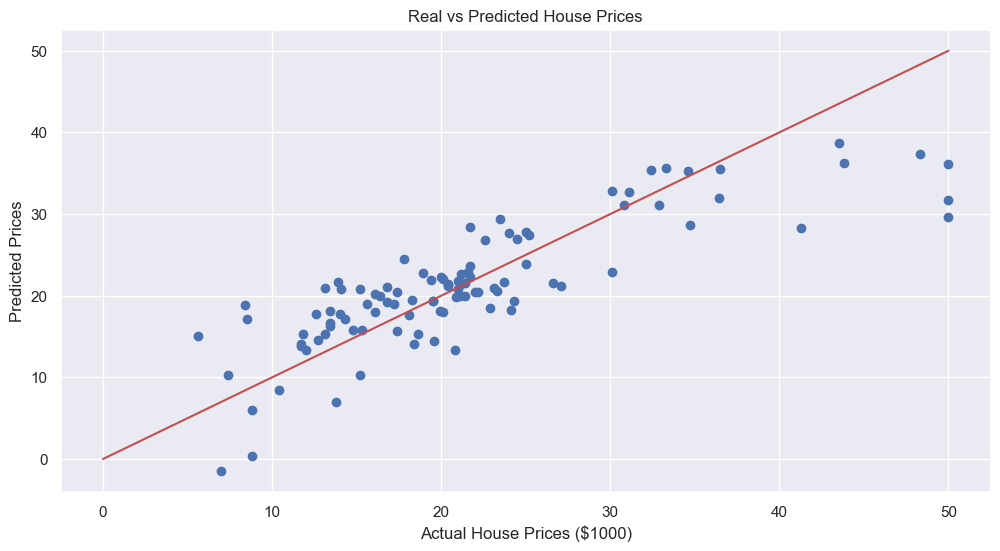

In [49]:
plt.scatter(y_test, pred_test)
plt.xlabel('Actual House Prices ($1000)')
plt.ylabel('Predicted Prices')
plt.title("Real vs Predicted House Prices")
plt.plot([0, 50], [0, 50], 'r')
plt.show()

* 큰 변화 없는 것을 알 수 있음

In [50]:
# RM의 영향을 보기 위해 학습데이터에서 해당 열 제거하여 위 과정 반복

X = boston.drop(['PRICE', 'RM'], axis=1)
y = boston['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

reg = LinearRegression()
reg.fit(X_train, y_train)

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data: ', rmse_tr)
print('RMSE of Test Data: ', rmse_test)

RMSE of Train Data:  4.983044351236729
RMSE of Test Data:  5.443463662690229


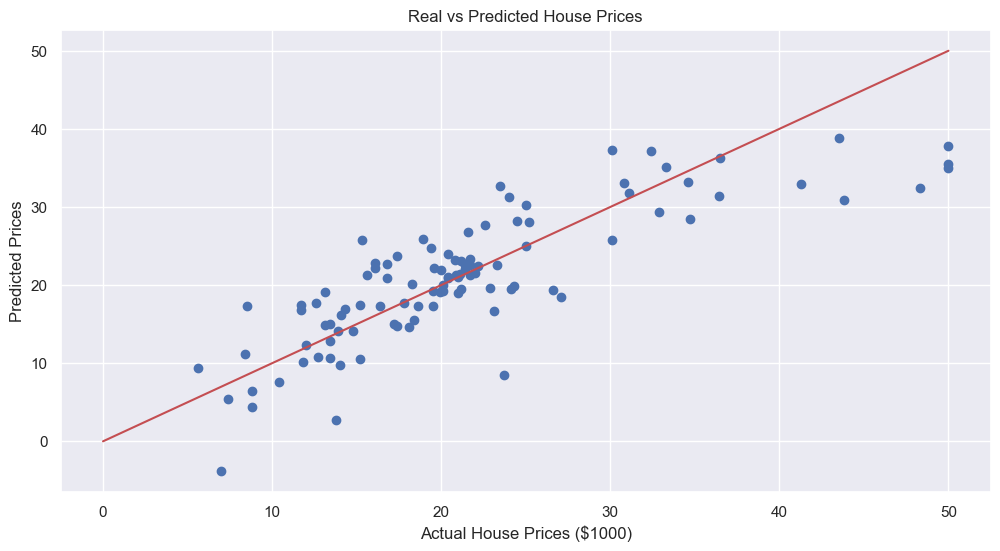

In [51]:
plt.scatter(y_test, pred_test)
plt.xlabel('Actual House Prices ($1000)')
plt.ylabel('Predicted Prices')
plt.title("Real vs Predicted House Prices")
plt.plot([0, 50], [0, 50], 'r')
plt.show()